In [71]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile as wav
from scipy.fftpack import fft, ifft
from math import pi, sin
import matplotlib.image as mpimg
eps = sys.float_info.epsilon
from scipy.signal import lfilter

# Partie 1 : Bruit

In [2]:
rate_1, data_1 = wav.read('noise1.wav')
rate_2, data_2 = wav.read('noise2.wav')
rate_3, data_3 = wav.read('noise3.wav')



In [3]:
t1 = len(data_1)/rate_1
t2 = len(data_2)/rate_2
t3 = len(data_3)/rate_3

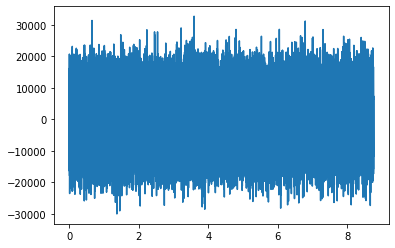

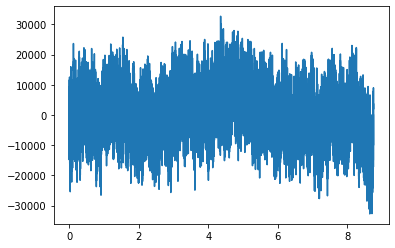

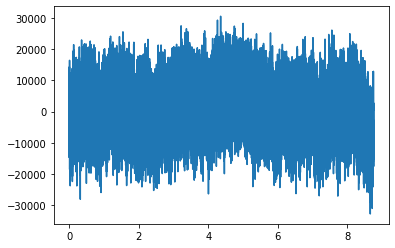

In [4]:
plt.plot(np.arange(0,t1,1/rate_1), data_1)
plt.show()
plt.plot(np.arange(0,t1,1/rate_2), data_2)
plt.show()
plt.plot(np.arange(0,t3,1/rate_3), data_3)
plt.show()


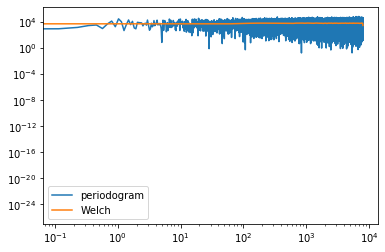

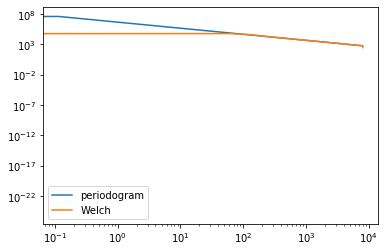

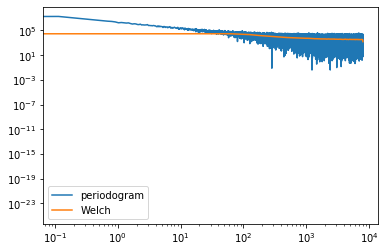

In [5]:
f_1, Pxx_den_1 = signal.periodogram(data_1, rate_1)
plt.plot(f_1, Pxx_den_1, label='periodogram')
f_1, Pxx_den_1 = signal.welch(data_1, rate_1)
plt.plot(f_1, Pxx_den_1, label='Welch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

f_2, Pxx_den_2 = signal.periodogram(data_2, rate_2)
plt.plot(f_2, Pxx_den_2, label='periodogram')
f_2, Pxx_den_2 = signal.welch(data_2, rate_2)
plt.semilogy(f_2, Pxx_den_2, label='Welch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

f_3, Pxx_den_3 = signal.periodogram(data_3, rate_3)
plt.plot(f_3, Pxx_den_3, label='periodogram')
f_3, Pxx_den_3 = signal.welch(data_3, rate_3)
plt.plot(f_3, Pxx_den_3, label='Welch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# Partie 2 : Image

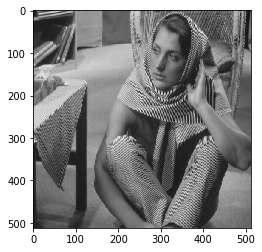

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


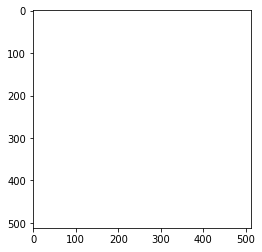

In [59]:
img = mpimg.imread('barbara.jpg')
plt.imshow(img)
plt.show()
shape = img.shape

target_snr = 0
w_noise = np.random.normal(shape)

actual_snr = np.sum(img)/np.sum(w_noise)
w_noise *= actual_snr / (target_snr+eps)


noised_img = img + w_noise

plt.imshow(noised_img)
plt.show()

# denoised_img = signal.wiener(noised_img)
# plt.imshow(denoised_img)
# plt.show()


# Partie 3 : Musique

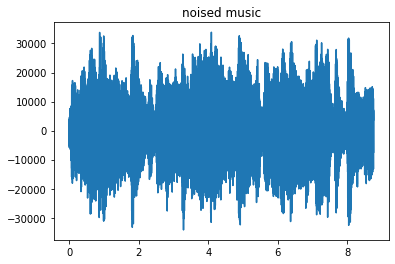

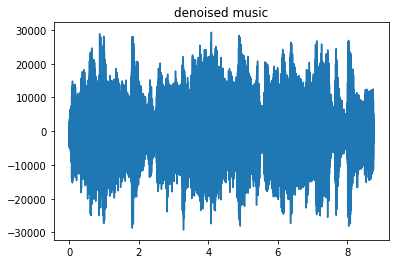

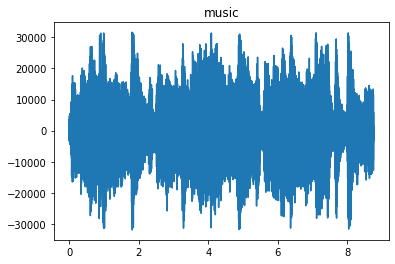

In [80]:
rate_1, data_1 = wav.read('noise1.wav')
rate_2, data_2 = wav.read('noise2.wav')
rate_3, data_3 = wav.read('noise3.wav')

rate_m, data_m = wav.read('music.wav')
N = len(data_m)
time = N/rate_m
x = np.arange(0,time, time/N)

noise = 0.1 * (data_1 + data_2 + data_3)
noised_music = data_m + noise
plt.plot(x, noised_music)
plt.title("noised music")
plt.show()

sig_noise = np.std(noise)
mu_noise = np.mean(noise)
P = 1/ N * np.power(np.abs(fft(data_m)),2)
wien_filter = np.real(ifft( P / (P + sig_noise)))

denoised_music = lfilter(wien_filter,1, noised_music )
plt.plot(x, denoised_music)
plt.title("denoised music")
plt.show()

plt.plot(x, data_m)
plt.title("music")
plt.show()